In [1]:
import numpy as np
import matplotlib.pyplot as plt
import datetime, sys, re, os
import pandas as pd

In [2]:
import csky as cy
import astropy
import healpy as hp
import histlite as hl
cy.plotting.mrichman_mpl()
soft_colors = cy.plotting.soft_colors

/mnt/lfs7/user/ssclafani/software/external/csky/csky/plotting.py:92: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  r'\SetSymbolFont{operators}   {sans}{OT1}{cmss} {m}{n}'


In [3]:
import matplotlib as mpl

In [4]:
repo = cy.selections.Repository(local_root='/data/user/ssclafani/data/analyses')
ana_dir = cy.utils.ensure_dir('/data/user/ssclafani/data/analyses')
plot_dir = cy.utils.ensure_dir('/home/ssclafani/public_html/DNNCASACDE/plots/ps_sens')

In [5]:
# derive from MESC settings
class Cascades(cy.selections.MESEDataSpecs.MESCDataSpec):

    # set livetime and data
    _keep = _keep = 'mjd true_energy oneweight'.split ()                       
    _keep32 = ['azimuth', 'zenith', 'ra', 'dec', 'energy', 'sigma',
               'dist', 'true_ra', 'true_dec', 'xdec' ,'xra', 'mu_score', 'c_score',
               'dpsi', 'delta_ra', 'delta_dec'] 
    _livetime = 3519.685 * 86400 #356 * 86400 #

    _path_data = ['/data/ana/PointSource/DNNCascade/analysis/version-001-p00/IC86_2011_exp.npy',
                  '/data/ana/PointSource/DNNCascade/analysis/version-001-p00/IC86_2012_exp.npy',
                  '/data/ana/PointSource/DNNCascade/analysis/version-001-p00/IC86_2013_exp.npy',
                  '/data/ana/PointSource/DNNCascade/analysis/version-001-p00/IC86_2014_exp.npy',
                  '/data/ana/PointSource/DNNCascade/analysis/version-001-p00/IC86_2015_exp.npy',
                  '/data/ana/PointSource/DNNCascade/analysis/version-001-p00/IC86_2016_exp.npy',
                  '/data/ana/PointSource/DNNCascade/analysis/version-001-p00/IC86_2017_exp.npy',
                  '/data/ana/PointSource/DNNCascade/analysis/version-001-p00/IC86_2018_exp.npy',
                  '/data/ana/PointSource/DNNCascade/analysis/version-001-p00/IC86_2019_exp.npy',
                  '/data/ana/PointSource/DNNCascade/analysis/version-001-p00/IC86_2020_exp.npy']
    
    _path_sig = '/data/ana/PointSource/DNNCascade/analysis/version-001-p00/MC_NuGen_bfrv1_2153x.npy'
    #_path_sig = '/data/ana/PointSource/DNNCascade/analysis/version-001-p00/systematics/SnowStorm_Spice321/MC_NuGen_snowstorm_214xx.npy'
    _bins_sindec = np.linspace (-1, 1, 31)
    _bins_logenergy = np.linspace (2, 8.0, 15)
    _kw_energy = dict (bins_sindec=np.linspace (-1, 1, 10))



In [6]:
specs = [Cascades] #cy.selections.DNNCascadeDataSpecs.DNNC_11yr
ana = cy.analysis.Analysis (repo, specs)


Setting up Analysis for:
Cascades
Setting up Cascades...
Reading /data/ana/PointSource/DNNCascade/analysis/version-001-p00/MC_NuGen_bfrv1_2153x.npy ...
Reading /data/ana/PointSource/DNNCascade/analysis/version-001-p00/IC86_2011_exp.npy ...
Reading /data/ana/PointSource/DNNCascade/analysis/version-001-p00/IC86_2012_exp.npy ...
Reading /data/ana/PointSource/DNNCascade/analysis/version-001-p00/IC86_2013_exp.npy ...
Reading /data/ana/PointSource/DNNCascade/analysis/version-001-p00/IC86_2014_exp.npy ...
Reading /data/ana/PointSource/DNNCascade/analysis/version-001-p00/IC86_2015_exp.npy ...
Reading /data/ana/PointSource/DNNCascade/analysis/version-001-p00/IC86_2016_exp.npy ...
Reading /data/ana/PointSource/DNNCascade/analysis/version-001-p00/IC86_2017_exp.npy ...
Reading /data/ana/PointSource/DNNCascade/analysis/version-001-p00/IC86_2018_exp.npy ...
Reading /data/ana/PointSource/DNNCascade/analysis/version-001-p00/IC86_2019_exp.npy ...
Reading /data/ana/PointSource/DNNCascade/analysis/versio

In [7]:
decs = np.arange(-89, 89.1, 2)

In [8]:
'''base_dir = '/data/user/ssclafani/data/analyses/DNNC_11yr/ps/trials/ECAS'
sigfile = '{}/sig.dict'.format (base_dir)
sig = np.load (sigfile, allow_pickle=True)

bgfile = '{}/bg_chi2.dict'.format (base_dir)
bg = np.load (bgfile, allow_pickle=True)'''

"base_dir = '/data/user/ssclafani/data/analyses/DNNC_11yr/ps/trials/ECAS'\nsigfile = '{}/sig.dict'.format (base_dir)\nsig = np.load (sigfile, allow_pickle=True)\n\nbgfile = '{}/bg_chi2.dict'.format (base_dir)\nbg = np.load (bgfile, allow_pickle=True)"

In [9]:
'''def find_n_sig(dec, gamma=2.0, beta=0.9, nsigma=None, cutoff=None, verbose=False):
    # get signal trials, background distribution, and trial runner
    if cutoff == None:
        cutoff = np.inf
    if verbose:
        print(gamma, dec, cutoff)

    sig_trials = cy.bk.get_best(sig,  'gamma', gamma, 'cutoff_TeV', 
        cutoff, 'dec', dec, 'nsig')
    
    b = cy.bk.get_best(bg,  'dec', dec)
    if verbose:
        print(b)
    conf= {
    'src' : cy.sources(dec=dec, ra=0, deg=True),
    'flux' : cy.hyp.PowerLawFlux(gamma=gamma, energy_cutoff=cutoff*1e3)
            }
    tr = cy.get_trial_runner(ana=ana, conf=conf)
        # determine ts threshold
    if nsigma !=None:
        #print('sigma = {}'.format(nsigma))
        ts = b.isf_nsigma(nsigma)
    else:
        #print('Getting sensitivity')
        ts = cy.dists.Chi2TSD(b).median()
    if verbose:
        print(ts)

    # include background trials in calculation
    trials = {0: b}
    trials.update(sig_trials)
    #print(trials)
    
    #for key in trials.keys():
    #    trials[key] = trials[key].trials
    # get number of signal events
    # (arguments prevent additional trials from being run)

    result = tr.find_n_sig(ts, beta, max_batch_size=0, logging=verbose, trials=trials)
    flux = tr.to_E2dNdE(result['n_sig'], E0=100, unit=1e3)
    # return flux
    if verbose:
        print(ts, beta, result['n_sig'], flux)
    return flux #, result['n_sig']'''

"def find_n_sig(dec, gamma=2.0, beta=0.9, nsigma=None, cutoff=None, verbose=False):\n    # get signal trials, background distribution, and trial runner\n    if cutoff == None:\n        cutoff = np.inf\n    if verbose:\n        print(gamma, dec, cutoff)\n\n    sig_trials = cy.bk.get_best(sig,  'gamma', gamma, 'cutoff_TeV', \n        cutoff, 'dec', dec, 'nsig')\n    \n    b = cy.bk.get_best(bg,  'dec', dec)\n    if verbose:\n        print(b)\n    conf= {\n    'src' : cy.sources(dec=dec, ra=0, deg=True),\n    'flux' : cy.hyp.PowerLawFlux(gamma=gamma, energy_cutoff=cutoff*1e3)\n            }\n    tr = cy.get_trial_runner(ana=ana, conf=conf)\n        # determine ts threshold\n    if nsigma !=None:\n        #print('sigma = {}'.format(nsigma))\n        ts = b.isf_nsigma(nsigma)\n    else:\n        #print('Getting sensitivity')\n        ts = cy.dists.Chi2TSD(b).median()\n    if verbose:\n        print(ts)\n\n    # include background trials in calculation\n    trials = {0: b}\n    trials.update

In [10]:
'''build_sens = False
if build_sens:
    fluxs_E200 = []
    fluxs_E250 = []
    fluxs_E300 = []
    fluxs_E200_100TeVcutoff = []
    fluxs_E200_1PeVcutoff = []
    decs = np.arange(-89, 89.1, 2)
    for i, dec in enumerate(decs):
        print(dec)
        fluxs_E200.append(find_n_sig(dec, gamma=2.0, verbose=False))
        fluxs_E250.append(find_n_sig(dec, gamma=2.5, verbose=False))
        fluxs_E300.append(find_n_sig(dec, gamma=3.0, verbose=False))
        fluxs_E200_100TeVcutoff.append(find_n_sig(dec, gamma=2.0, cutoff=100))
        fluxs_E200_1PeVcutoff.append(find_n_sig(dec, gamma=2.0, cutoff=1e3))

    fluxs_E200 = np.array(fluxs_E200)
    fluxs_E250 = np.array(fluxs_E250)
    fluxs_E300 = np.array(fluxs_E300)
    fluxs_E200_100TeVcutoff = np.array(fluxs_E200_100TeVcutoff)
    fluxs_E200_1PeVcutoff = np.array(fluxs_E200_1PeVcutoff)
    print('SAVING!')
    np.save(base_dir + '/ps_sens_flux_E200.npy', fluxs_E200)
    np.save(base_dir + '/ps_sens_flux_E250.npy', fluxs_E250)
    np.save(base_dir + '/ps_sens_flux_E300.npy', fluxs_E300)
    np.save(base_dir + '/ps_sens_flux_E200_cutoff_100TeV.npy', fluxs_E200_100TeVcutoff)
    np.save(base_dir + '/ps_sens_flux_E200_cutoff_1PeV.npy', fluxs_E200_1PeVcutoff)

else:
    fluxs_E200 = np.load(base_dir + '/ps_sens_flux_E200.npy')
    fluxs_E250 = np.load(base_dir + '/ps_sens_flux_E250.npy')
    fluxs_E300 = np.load(base_dir + '/ps_sens_flux_E300.npy')
    fluxs_E200_100TeVcutoff = np.load(base_dir + '/ps_sens_flux_E200_cutoff_100TeV.npy')
    fluxs_E200_1PeVcutoff = np.load(base_dir + '/ps_sens_flux_E200_cutoff_1PeV.npy')'''

"build_sens = False\nif build_sens:\n    fluxs_E200 = []\n    fluxs_E250 = []\n    fluxs_E300 = []\n    fluxs_E200_100TeVcutoff = []\n    fluxs_E200_1PeVcutoff = []\n    decs = np.arange(-89, 89.1, 2)\n    for i, dec in enumerate(decs):\n        print(dec)\n        fluxs_E200.append(find_n_sig(dec, gamma=2.0, verbose=False))\n        fluxs_E250.append(find_n_sig(dec, gamma=2.5, verbose=False))\n        fluxs_E300.append(find_n_sig(dec, gamma=3.0, verbose=False))\n        fluxs_E200_100TeVcutoff.append(find_n_sig(dec, gamma=2.0, cutoff=100))\n        fluxs_E200_1PeVcutoff.append(find_n_sig(dec, gamma=2.0, cutoff=1e3))\n\n    fluxs_E200 = np.array(fluxs_E200)\n    fluxs_E250 = np.array(fluxs_E250)\n    fluxs_E300 = np.array(fluxs_E300)\n    fluxs_E200_100TeVcutoff = np.array(fluxs_E200_100TeVcutoff)\n    fluxs_E200_1PeVcutoff = np.array(fluxs_E200_1PeVcutoff)\n    print('SAVING!')\n    np.save(base_dir + '/ps_sens_flux_E200.npy', fluxs_E200)\n    np.save(base_dir + '/ps_sens_flux_E250.np

In [11]:
estes_E_minus2 = np.load('/data/user/smancina/PSSearches/ESTES_2019/CSky/ESTES2021_Sens_E-2.npy')
estes_sd = estes_E_minus2[0]
estes_flux = estes_E_minus2[1]
conf= {
'src' : cy.sources(dec=0, ra=0, deg=True),
'flux' : cy.hyp.PowerLawFlux(gamma=2, energy_cutoff=np.inf)
        }
tr = cy.get_trial_runner(ana=ana, conf=conf)
nss = [tr.to_ns(f, E0=1, unit=1e3) for f in estes_flux]
estes_E2dNdE = [tr.to_E2dNdE(n, E0 = 100, unit=1e3) for n in nss]

In [12]:
tracks_E2 = np.load('saved_sens/tracks_10yr_E2.npy')
sd_t = tracks_E2[::2]
tracks_flux_E2 = tracks_E2[1::2]

In [13]:
sd_a = np.load('/data/user/ssclafani/data/analyses/catalogs/antares_13yr_E2_sd.npy')
phi_a = np.load('/data/user/ssclafani/data/analyses/catalogs/antares_13yr_E2_flux.npy')

In [23]:
E2_decs[4:-4]

array([-81., -79., -77., -75., -73., -71., -69., -67., -65., -63., -61.,
       -59., -57., -55., -53., -51., -49., -47., -45., -43., -41., -39.,
       -37., -35., -33., -31., -29., -27., -25., -23., -21., -19., -17.,
       -15., -13., -11.,  -9.,  -7.,  -5.,  -3.,  -1.,   1.,   3.,   5.,
         7.,   9.,  11.,  13.,  15.,  17.,  19.,  21.,  23.,  25.,  27.,
        29.,  31.,  33.,  35.,  37.,  39.,  41.,  43.,  45.,  47.,  49.,
        51.,  53.,  55.,  57.,  59.,  61.,  63.,  65.,  67.,  69.,  71.,
        73.,  75.,  77.,  79.,  81.])

In [14]:
base_dir = '/data/user/ssclafani/data/analyses/baseline_all/'
E2_decs = np.load(base_dir + 'ps/trials/DNNC/ps_sens_decs_E200.npy')
E2_fluxs = np.load(base_dir + 'ps/trials/DNNC/ps_sens_flux_E200.npy')

E3_decs = np.load(base_dir + 'ps/trials/DNNC/ps_sens_decs_E300.npy')
E3_fluxs = np.load(base_dir + 'ps/trials/DNNC/ps_sens_flux_E300.npy')

In [15]:
base_dir = '/data/user/ssclafani/data/analyses/systematics_full//'
E2_sysdecs = np.load(base_dir + 'ps/trials/DNNC/ps_sens_decs_E200.npy')
E2_sysfluxs = np.load(base_dir + 'ps/trials/DNNC/ps_sens_flux_E200.npy')

E3_sysdecs = np.load(base_dir + 'ps/trials/DNNC/ps_sens_decs_E300.npy')
E3_sysfluxs = np.load(base_dir + 'ps/trials/DNNC/ps_sens_flux_E300.npy')

Reading /data/user/ssclafani/data/analyses/performance/sens_E200_MESE.tuple.npy ...
Reading /data/user/ssclafani/data/analyses/performance/sens_E200_ps10_current.tuple.npy ...
-> /home/ssclafani/public_html/DNNCASACDE/plots/ps_sens/ps_sens_E200_no_sources


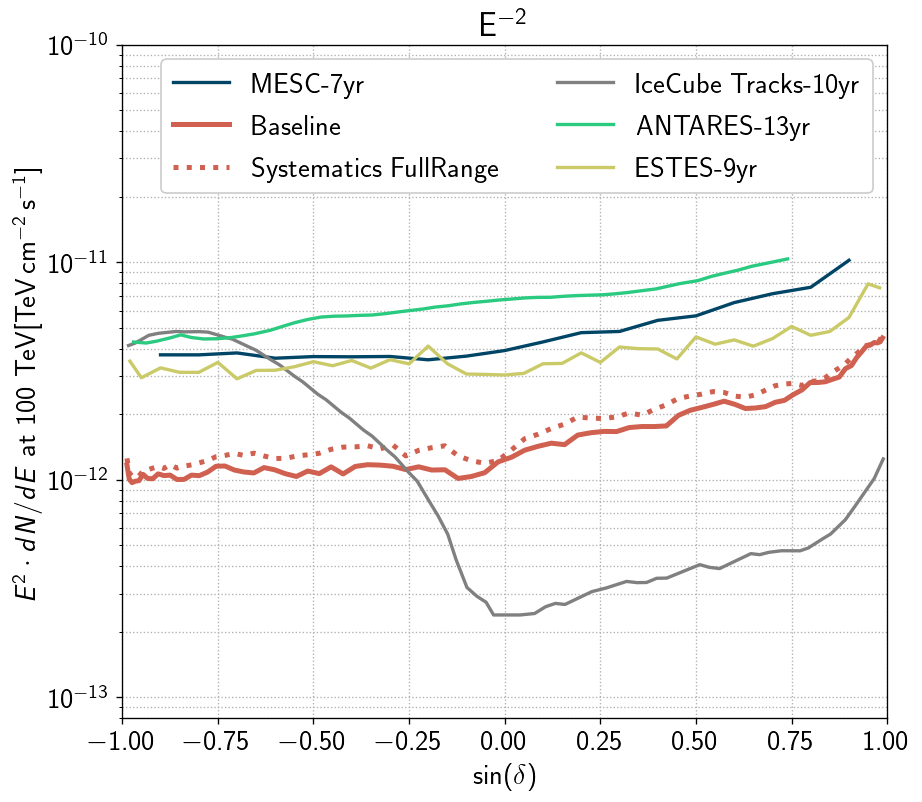

In [16]:
mpl.rc('font', size=17) 
fig, ax1 = plt.subplots (1, figsize=(8,7)) 
sd_m, phi_m = repo.get_performance('sens_E200_MESE')[:2]
ax1.semilogy (sd_m, phi_m,lw=2, c=soft_colors[0],  label=r'MESC-7yr')

ax1.semilogy(sorted(np.sin(np.radians(E2_decs[4:-4]))), E2_fluxs[4:-4], 
             ls = '-', c=soft_colors[1], lw=3, label='Baseline')
ax1.semilogy(sorted(np.sin(np.radians(E2_sysdecs[4:-4]))), E2_sysfluxs[4:-4], 
             ls = ':', c=soft_colors[1], lw=3, label='Systematics FullRange')
sd, phi = repo.get_performance ('sens_E200_ps10_current')[:2]
ax1.semilogy (sd_t, tracks_flux_E2, label=r'IceCube Tracks-10yr', color='grey', ls='-')
#antares_sens = pd.read_pickle('/data/user/ssclafani/data/analyses/catalogs/antares_E2.pickle')
#sd_a = antares_sens['sindec']
#phi_a = antares_sens['flux']
ax1.semilogy (sd_a, phi_a /1e3, label=r'ANTARES-13yr', color=soft_colors[2],lw=2,  ls='-')

ax1.semilogy(estes_sd, estes_E2dNdE, label='ESTES-9yr', color=soft_colors[4], lw=2)

ax1.set_xlabel (r'$\sin(\delta)$')
ax1.set_ylabel (
    r'$E^2\cdot dN/dE$'
    r' at 100 TeV'
    r'[$\textsf{TeV}\,\textsf{cm}^{-2}\,\textsf{s}^{-1}]$')
ax1.set_xlim (-1, 1)
ax1.grid(which='both')
ax1.set_ylim (.8e-13, 1e-10)
ax1.legend (ncol=2)
ax1.set_title('E$^{-2}$')
#if preliminary == True:
#    ax1.text(-.9, 1e-13, r'\textbf{IceCube Preliminary}', c='r')
plt.tight_layout()
cy.plotting.saving(plot_dir, 'ps_sens_E200_no_sources')

In [17]:
exgal_srcs = np.load('/home/ssclafani/DNNCascade/catalogs/ExGalSourceList_ESTES_SENS_E200.npy')

In [18]:
'''ex_decs = exgal_srcs[0]
ex_fluxs = np.interp(np.sin(np.radians(ex_decs)), np.sin(np.radians(decs)), fluxs_E200)'''

'ex_decs = exgal_srcs[0]\nex_fluxs = np.interp(np.sin(np.radians(ex_decs)), np.sin(np.radians(decs)), fluxs_E200)'

In [19]:
'''mpl.rc('font', size=16) 
fig, ax1 = plt.subplots (1, figsize=(8,7)) 
sd_m, phi_m = repo.get_performance('sens_E200_MESE')[:2]
ax1.semilogy (sd_m, phi_m,lw=2, c=soft_colors[0],  label=r'MESC-7yr')
ax1.semilogy(sorted(np.sin(np.radians(decs[4:-4]))), fluxs_E200[4:-4], 
             ls = '-', c=soft_colors[1], lw=3, label='DNNCascade-11yr')

#sd, phi = repo.get_performance ('sens_E200_ps10_current')[:2]
ax1.semilogy (sd_t, tracks_flux_E2, label=r'PSTracks-10yr', color='grey', ls='-')
antares_sens = pd.read_pickle('/data/user/ssclafani/data/analyses/catalogs/antares_E2.pickle')
sd_a = antares_sens['sindec']
phi_a = antares_sens['flux']
ax1.semilogy (sd_a, phi_a, label=r'Antares-11yr', color=soft_colors[2],lw=2,  ls='-')

ax1.scatter(np.sin(np.radians(ex_decs)), ex_fluxs, lw=1, color='k', marker='.', zorder=20, label='Sources')
ax1.set_xlabel (r'$\sin(\delta)$')
ax1.set_ylabel (
    r'$E^2\cdot dN/dE$'
    r' at 100 TeV'
    r'[${TeV}\,{cm}^{-2}\,{s}^{-1}]$')
ax1.set_xlim (-1, 1)
ax1.grid(which='both')
ax1.set_ylim (.8e-13, 1e-10)
ax1.legend (ncol=2)
ax1.set_title('E$^{-2}$')
plt.tight_layout()
cy.plotting.saving(plot_dir, 'ps_sens_E200_sources')'''

"mpl.rc('font', size=16) \nfig, ax1 = plt.subplots (1, figsize=(8,7)) \nsd_m, phi_m = repo.get_performance('sens_E200_MESE')[:2]\nax1.semilogy (sd_m, phi_m,lw=2, c=soft_colors[0],  label=r'MESC-7yr')\nax1.semilogy(sorted(np.sin(np.radians(decs[4:-4]))), fluxs_E200[4:-4], \n             ls = '-', c=soft_colors[1], lw=3, label='DNNCascade-11yr')\n\n#sd, phi = repo.get_performance ('sens_E200_ps10_current')[:2]\nax1.semilogy (sd_t, tracks_flux_E2, label=r'PSTracks-10yr', color='grey', ls='-')\nantares_sens = pd.read_pickle('/data/user/ssclafani/data/analyses/catalogs/antares_E2.pickle')\nsd_a = antares_sens['sindec']\nphi_a = antares_sens['flux']\nax1.semilogy (sd_a, phi_a, label=r'Antares-11yr', color=soft_colors[2],lw=2,  ls='-')\n\nax1.scatter(np.sin(np.radians(ex_decs)), ex_fluxs, lw=1, color='k', marker='.', zorder=20, label='Sources')\nax1.set_xlabel (r'$\\sin(\\delta)$')\nax1.set_ylabel (\n    r'$E^2\\cdot dN/dE$'\n    r' at 100 TeV'\n    r'[${TeV}\\,{cm}^{-2}\\,{s}^{-1}]$')\nax1.s

In [20]:
estes_E_minus2 = np.load('/data/user/smancina/PSSearches/ESTES_2019/CSky/ESTES2021_Sens_E-3.npy')
estes_sd = estes_E_minus2[0]
estes_flux = estes_E_minus2[1]
conf= {
'src' : cy.sources(dec=0, ra=0, deg=True),
'flux' : cy.hyp.PowerLawFlux(gamma=3, energy_cutoff=np.inf)
        }
tr = cy.get_trial_runner(ana=ana, conf=conf)
nss = [tr.to_ns(f, E0=1, unit=1e3) for f in estes_flux]
estes_E2dNdE = [tr.to_E2dNdE(n, E0 = 100, unit=1e3) for n in nss]

Reading /data/user/ssclafani/data/analyses/performance/sens_E300_MESE.tuple.npy ...
-> /home/ssclafani/public_html/DNNCASACDE/plots/ps_sens/ps_sens_E300_no_sources


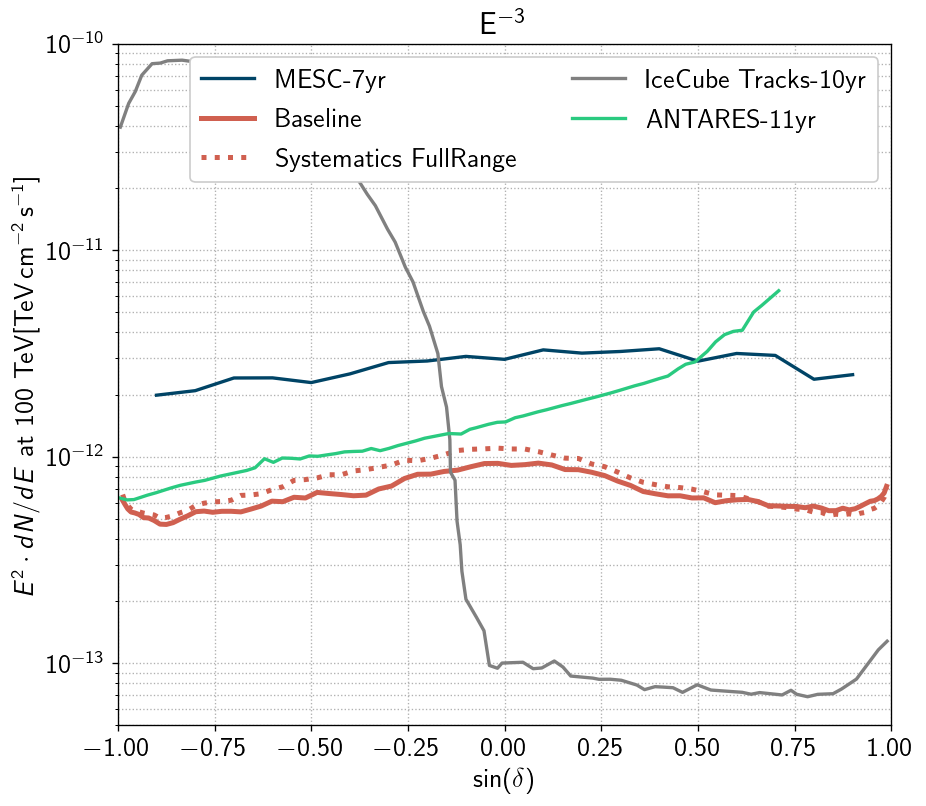

In [21]:
mpl.rc('font', size=16) 
fig, ax1 = plt.subplots (1, figsize=(8,7)) 

sd_m, phi_m = repo.get_performance('sens_E300_MESE')[:2]
ax1.semilogy (sd_m, phi_m,lw=2, c=soft_colors[0],  label=r'MESC-7yr')
ax1.semilogy(sorted(np.sin(np.radians(E3_decs[4:-4]))), E3_fluxs[4:-4], 
             ls = '-', c=soft_colors[1], lw=3, label='Baseline')
ax1.semilogy(sorted(np.sin(np.radians(E3_sysdecs[4:-4]))), E3_sysfluxs[4:-4], 
             ls = ':', c=soft_colors[1], lw=3, label='Systematics FullRange')
tracks = pd.read_pickle('/data/user/ssclafani/data/analyses/catalogs/10yr_sens_E300.pickle')
sd = tracks['sindec']
E2dNdE = tracks['E2dNdE']
ax1.semilogy (sd, E2dNdE, label=r'IceCube Tracks-10yr', color='grey', ls='-')


antares_sens = pd.read_pickle('/data/user/ssclafani/data/analyses/catalogs/antares_sens_E300.pickle')
sd = antares_sens['sindec']
e2dnde = antares_sens['E2dNdE']
ax1.semilogy(sd, e2dnde,  label=r'ANTARES-11yr', color=soft_colors[2],lw=2,  ls='-')

#ax1.semilogy(estes_sd, estes_E2dNdE, label='ESTES 9yr', color=soft_colors[4], lw=2)

ax1.set_xlabel (r'$\sin(\delta)$')
ax1.set_ylabel (
    r'$E^2\cdot dN/dE$'
    r' at 100 TeV'
    r'[$\textsf{TeV}\,\textsf{cm}^{-2}\,\textsf{s}^{-1}]$')
ax1.set_xlim (-1, 1)
ax1.grid(which='both')
ax1.set_ylim (.5e-13, 1e-10)
ax1.legend (ncol=2)
ax1.set_title('E$^{-3}$')
plt.tight_layout()

cy.plotting.saving(plot_dir, 'ps_sens_E300_no_sources')

Reading /data/user/ssclafani/data/analyses/performance/sens_E250_MESE.tuple.npy ...


NameError: name 'fluxs_E300' is not defined

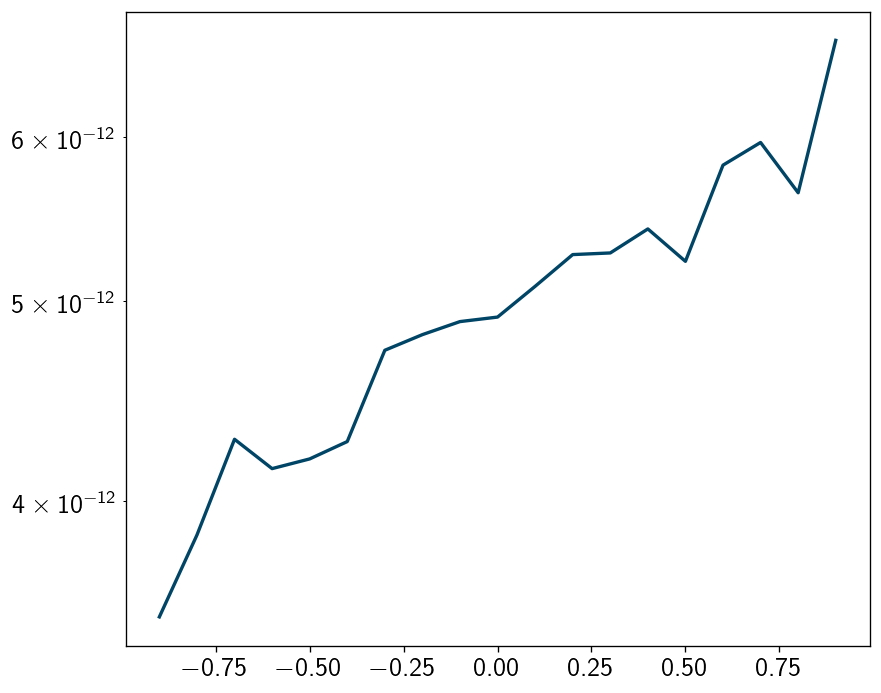

In [34]:
mpl.rc('font', size=16) 
fig, ax1 = plt.subplots (1, figsize=(8,7)) 

sd_m, phi_m = repo.get_performance('sens_E250_MESE')[:2]
ax1.semilogy (sd_m, phi_m,lw=2, c=soft_colors[0],  label=r'MESC-7yr')
ax1.semilogy(sorted(np.sin(np.radians(decs[4:-4]))), fluxs_E300[4:-4], 
             ls = '-', c=soft_colors[1], lw=3, label='DNNCascade-11yr')
#tracks = pd.read_pickle('/data/user/ssclafani/data/analyses/catalogs/10yr_sens_E300.pickle')
#sd = tracks['sindec']
#E2dNdE = tracks['E2dNdE']
#ax1.semilogy (sd, E2dNdE, label=r'PSTracks-10yr', color='grey', ls='-')


#antares_sens = pd.read_pickle('/data/user/ssclafani/data/analyses/catalogs/antares_sens_E300.pickle')
#sd = antares_sens['sindec']
#e2dnde = antares_sens['E2dNdE']
#ax1.semilogy(sd, e2dnde,  label=r'Antares-11yr', color=soft_colors[2],lw=2,  ls='-')

#ax1.semilogy(estes_sd, estes_E2dNdE, label='ESTES 9yr', color=soft_colors[4], lw=2)

ax1.set_xlabel (r'$\sin(\delta)$')
ax1.set_ylabel (
    r'$E^2\cdot dN/dE$'
    r' at 100 TeV'
    r'[${TeV}\,{cm}^{-2}\,{s}^{-1}]$')
ax1.set_xlim (-1, 1)
ax1.grid(which='both')
ax1.set_ylim (.8e-13, 1e-10)
ax1.legend (ncol=2)
ax1.set_title('E$^{-2.5}$')
plt.tight_layout()

cy.plotting.saving(plot_dir, 'ps_sens_E250_no_sources')

In [ ]:
MESC_cutoff_Flux = np.load('saved_sens/MESC_sens_100TeV_cutoff.npy')
sd = MESC_cutoff_Flux[::2]
MESC_flux_100TeVcutoff = MESC_cutoff_Flux[1::2]

In [ ]:
antares= [-0.9876522427310125, 9.441319436285771e-12,
-1.0072098793929252, 8.896278808190197e-12,
-0.953209071498644, 9.594230463244193e-12,
-0.9341947025217844, 9.678208301144843e-12,
-0.8931236655317676, 9.941795428126347e-12,
-0.8474891799873046, 1.0309435835186745e-11,
-0.8094604420335854, 1.033692516853843e-11,
-0.7592625079346761, 1.158816177891559e-11,
-0.7151491719083618, 1.1791910841934702e-11,
-0.6710358358820475, 1.1990531173438e-11,
-0.6269224998557332, 1.250537351247612e-11,
-0.5828091638294189, 1.3206472420641925e-11,
-0.537174678284956, 1.345820902024607e-11,
-0.491540192740493, 1.3665033529215598e-11,
-0.44590570719602995, 1.3986322924202649e-11,
-0.40179237116971556, 1.4469626964880728e-11,
-0.3576790351434014, 1.50836106153303e-11,
-0.31204454959893835, 1.5359969428238632e-11,
-0.2664100640544753, 1.5584697690205532e-11,
-0.22077557851001228, 1.5801234261780793e-11,
-0.17514109296554925, 1.610243119430851e-11,
-0.12950660742108622, 1.6266985284688367e-11,
-0.08387212187662318, 1.6385552480562725e-11,
-0.03823763633216015, 1.696681653391605e-11,
0.005875699694154246, 1.7572953992909763e-11,
0.04998903572046842, 1.8231613994880727e-11,
0.09562352126493145, 1.8837279731018468e-11,
0.13973685729124585, 1.9560683364357057e-11,
0.18537134283570889, 2.018931168705523e-11,
0.22948467886202306, 2.0898764340266142e-11,
0.27359801488833746, 2.1703085904383318e-11,
0.3207536499509491, 2.2197237943702194e-11,
0.36334583645911467, 2.3169018107926346e-11,
0.4089803220035777, 2.4236088245452966e-11,
0.451572508511743, 2.5611383720887138e-11,
0.49568584453805764, 2.718729874118477e-11,
0.5352357320099252, 2.932026023688193e-11,
0.5747856194817933, 3.16409809200577e-11,
0.6173778059899591, 3.449989457797988e-11,
0.6538853944255294, 3.820446862252359e-11,
0.687350683824802, 4.3050697908776633e-11]


In [5]:
antares_13yr_E2 = [-0.9705539761813295, 4.297042434745883e-9,
-0.9372606991932391, 4.252735556481788e-9,
-0.911534076066078, 4.332565277457784e-9,
-0.8726919195799723, 4.50038584869661e-9,
-0.8469652964528112, 4.637060491209079e-9,
-0.8192208989627359, 4.508663744461057e-9,
-0.7869365091561025, 4.4389472954769175e-9,
-0.752298049259402, 4.450927601349018e-9,
-0.7187357356895894, 4.4989305126668546e-9,
-0.689074452554745, 4.579923989732101e-9,
-0.6551085841123494, 4.684797455814707e-9,
-0.6131052477910108, 4.866786295281784e-9,
-0.5798119708029201, 5.079063636984054e-9,
-0.5491754300593339, 5.274662136135451e-9,
-0.5152095616169379, 5.456868267991922e-9,
-0.48023480599308543, 5.598807531986031e-9,
-0.44694152900499473, 5.648412446876519e-9,
-0.41364825201690403, 5.6646284850263266e-9,
-0.3803549750288133, 5.698456856707154e-9,
-0.3470616980407226, 5.7211212625715375e-9,
-0.3137684210526319, 5.799879771225839e-9,
-0.2804751440645412, 5.903107842447166e-9,
-0.24839253169419928, 5.995731703569254e-9,
-0.2138885900883598, 6.09693063048084e-9,
-0.18227679173603129, 6.220593011783492e-9,
-0.14843703419131815, 6.30754092507519e-9,
-0.11552208989627388, 6.432700399488916e-9,
-0.080715482135997, 6.536227910900255e-9,
-0.04742220514790629, 6.6174458411501705e-9,
-0.016482998249883085, 6.7009863669220645e-9,
0.014840546622029382, 6.7684069080905084e-9,
0.05245762581636537, 6.8551008499581594e-9,
0.08688590088359582, 6.895658384714969e-9,
0.11947656001317108, 6.9010370505408805e-9,
0.1540189354164001, 6.977451996649152e-9,
0.18623606607760257, 7.023111571556144e-9,
0.2183186784479445, 7.053843908173724e-9,
0.25457135783497664, 7.083565105507699e-9,
0.28584686046015273, 7.152631309103302e-9,
0.318803841721091, 7.25003043354668e-9,
0.3520971187091817, 7.375814959540208e-9,
0.3949748239211166, 7.53861213482702e-9,
0.42608217868271625, 7.755005055992237e-9,
0.45681960814444844, 7.971161511792324e-9,
0.5049435266999613, 8.233189419480205e-9,
0.541263465232424, 8.618742437298401e-9,
0.5790967345370723, 8.939697641981619e-9,
0.6107085328894009, 9.204107977731011e-9,
0.6450779562043794, 9.577906725273999e-9,
0.6789765655013444, 9.84624827240291e-9,
0.7122698424894351, 1.0123670495312208e-8,
0.739509796388782, 1.0358532801175263e-8]


In [6]:
antares_sd = antares_13yr_E2[::2]
antares_flux = antares_13yr_E2[1::2]

In [7]:
np.save('/data/user/ssclafani/data/analyses/catalogs/antares_13yr_E2_sd.npy', antares_sd)
np.save('/data/user/ssclafani/data/analyses/catalogs/antares_13yr_E2_flux.npy', antares_flux)

In [ ]:
np.save('saved_sens/ANTARES_sens_100TeV_cutoff.npy', amtare)

In [ ]:
np.save('saved_sens/ANTARES_sens_100TeV_cutoff.npy', amtare)

In [ ]:
antares_sd = antares[::2]
antares_flux = antares[1::2]

In [ ]:
mpl.rc('font', size=16) 
fig, ax1 = plt.subplots (1, figsize=(8,7)) 

#sd_m, phi_m = repo.get_performance('sens_E200_100TeVCutoffMESE')[:2]
ax1.semilogy (sd, MESC_flux_100TeVcutoff,lw=3, c=soft_colors[0],  label=r'MESC-7yr E$_{cutoff}$=100TeV')
ax1.semilogy (antares_sd, antares_flux,lw=3, c=soft_colors[2],  label=r'Antares-9yr E$_{cutoff}$=100TeV')

ax1.semilogy(sorted(np.sin(np.radians(decs[4:-4]))), fluxs_E200_100TeVcutoff[4:-4], 
             ls = '-', c=soft_colors[1], lw=3, label='DNNCascade-11yr E$_{cutoff}$=100TeV')

ax1.semilogy(sorted(np.sin(np.radians(decs[4:-4]))), fluxs_E200_1PeVcutoff[4:-4], 
             ls = '-', c=soft_colors[3], lw=3, label='DNNCascade-11yr E$_{cutoff}$=1PeV')
ax1.semilogy(sorted(np.sin(np.radians(decs[4:-4]))), fluxs_E200[4:-4], 
             ls = '-', c=soft_colors[3], lw=3, alpha =.7,  label='DNNCascade-11yr No Cutoff')


ax1.set_xlabel (r'$\sin(\delta)$')
ax1.set_ylabel (
    r'$E^2\cdot dN/dE$'
    r' at 100 TeV'
    r'[${TeV}\,{cm}^{-2}\,{s}^{-1}]$')
ax1.set_xlim (-1, 1)
ax1.grid(which='both')
ax1.set_ylim (.8e-13, 1e-10)
ax1.legend (ncol=1)
ax1.set_title('E$^{-2} \cdot exp(-E/E_{cutoff})$')
plt.tight_layout()
cy.plotting.saving(plot_dir, 'ps_sens_E200_cutoff_no_sources')